In [61]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from os import path 

In [62]:
def process_baseline_results() :
    cartoon_file = "./results/baseline/cartoon/results.csv"
    photo_file = "./results/baseline/photo/results.csv"
    sketch_file = "./results/baseline/sketch/results.csv"

    if not path.exists(cartoon_file) or not path.exists(photo_file) or not path.exists(sketch_file) :
        raise BaseException('One or more files not found')
    
    cartoon_res = pd.read_csv(cartoon_file)
    cartoon_res.columns = cartoon_res.columns.str.strip()

    sketch_res = pd.read_csv(sketch_file)
    sketch_res.columns = sketch_res.columns.str.strip()
    
    photo_res = pd.read_csv(photo_file)
    photo_res.columns = photo_res.columns.str.strip()

    table = pd.DataFrame([[np.max(cartoon_res['Accuracy']), np.max(sketch_res['Accuracy']), np.max(photo_res['Accuracy'])]], columns=["Art Painting $\longrightarrow$ Cartoon", "Art Painting $\longrightarrow$ Sketch", "Art Painting $\longrightarrow$ Photo"])
    table['Average'] = table[["Art Painting $\longrightarrow$ Cartoon", "Art Painting $\longrightarrow$ Sketch", "Art Painting $\longrightarrow$ Photo"]].astype(float).mean(numeric_only=True, axis=1)
    
    return table

In [63]:
process_baseline_results()

,Art Painting $\longrightarrow$ Cartoon,Art Painting $\longrightarrow$ Sketch,Art Painting $\longrightarrow$ Photo,Average
0,0.558447,0.405701,0.956287,0.640145


In [64]:
process_baseline_results().style.hide(axis='index').to_latex()

'\\begin{tabular}{rrrr}\nArt Painting $\\longrightarrow$ Cartoon & Art Painting $\\longrightarrow$ Sketch & Art Painting $\\longrightarrow$ Photo & Average \\\\\n0.558447 & 0.405701 & 0.956287 & 0.640145 \\\\\n\\end{tabular}\n'

In [65]:
def plot_random_results() :
    cartoon_file = "./results/random/cartoon/results.csv"
    photo_file = "./results/random/photo/results.csv"
    sketch_file = "./results/random/sketch/results.csv"

    if not path.exists(cartoon_file) or not path.exists(photo_file) or not path.exists(sketch_file) :
        raise BaseException('One or more files not found')
    
    cartoon_res = pd.read_csv(cartoon_file)
    cartoon_res.columns = cartoon_res.columns.str.strip()
    cartoon_res = cartoon_res.rename(columns={'Ratio of 1s (if random)' : 'ratio_1'})

    sketch_res = pd.read_csv(sketch_file)
    sketch_res.columns = sketch_res.columns.str.strip()
    sketch_res = sketch_res.rename(columns={'Ratio of 1s (if random)' : 'ratio_1'})
    
    photo_res = pd.read_csv(photo_file)
    photo_res.columns = photo_res.columns.str.strip()
    photo_res = photo_res.rename(columns={'Ratio of 1s (if random)' : 'ratio_1'})


    datasets = {'Cartoon' : cartoon_res, 'Sketch' : sketch_res, 'Photo' : photo_res}
    acc_max = dict()
    for name, dataset in datasets.items() :
        acc_max[name] = dict()
        for ratio in np.unique(dataset['ratio_1']) :
            acc_max[name][ratio] = np.max(dataset[dataset['ratio_1'] == ratio]['Accuracy'])
    
    ratios = np.unique(cartoon_res['ratio_1'])
    for name in datasets.keys() :
        plt.plot(ratios, list(acc_max[name].values()), '--o', label=name)

    plt.xlabel("Percentage of 1 in the activation mask")
    plt.ylabel("Max reached accuracy on target domain")
    plt.title("Max accuracy vs. Fraction of 1 in activation mask")
    plt.legend(loc=(0.05,0.63))
    plt.show()


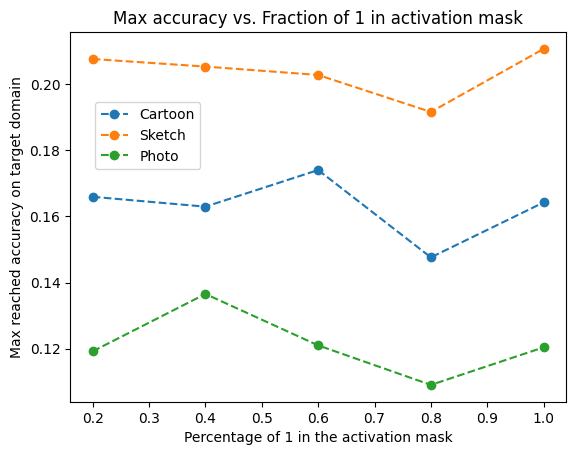

In [66]:
# A table is probably best
plot_random_results()

In [67]:
def table_random_results() :
    cartoon_file = "./results/random/cartoon/results.csv"
    photo_file = "./results/random/photo/results.csv"
    sketch_file = "./results/random/sketch/results.csv"

    if not path.exists(cartoon_file) or not path.exists(photo_file) or not path.exists(sketch_file) :
        raise BaseException('One or more files not found')
    
    cartoon_res = pd.read_csv(cartoon_file)
    cartoon_res.columns = cartoon_res.columns.str.strip()
    cartoon_res = cartoon_res.rename(columns={'Ratio of 1s (if random)' : 'ratio_1'})

    sketch_res = pd.read_csv(sketch_file)
    sketch_res.columns = sketch_res.columns.str.strip()
    sketch_res = sketch_res.rename(columns={'Ratio of 1s (if random)' : 'ratio_1'})
    
    photo_res = pd.read_csv(photo_file)
    photo_res.columns = photo_res.columns.str.strip()
    photo_res = photo_res.rename(columns={'Ratio of 1s (if random)' : 'ratio_1'})


    datasets = {'Cartoon' : cartoon_res, 'Sketch' : sketch_res, 'Photo' : photo_res}
    acc_max = dict()
    for name, dataset in datasets.items() :
        acc_max[name] = dict()
        for ratio in np.unique(dataset['ratio_1']) :
            acc_max[name][ratio] = np.max(dataset[dataset['ratio_1'] == ratio]['Accuracy'])
    
    ratios = np.unique(cartoon_res['ratio_1'])
    
    table = pd.DataFrame(np.array([ratios, list(acc_max['Cartoon'].values()), list(acc_max['Sketch'].values()), list(acc_max['Photo'].values())]).T, columns=["Ratio of '1'", "Art Painting $\longrightarrow$ Cartoon", "Art Painting $\longrightarrow$ Sketch", "Art Painting $\longrightarrow$ Photo"])
    table['Average'] = table[["Art Painting $\longrightarrow$ Cartoon", "Art Painting $\longrightarrow$ Sketch", "Art Painting $\longrightarrow$ Photo"]].astype(float).mean(numeric_only=True, axis=1)
    
    return table

In [68]:
table_random_results()

,Ratio of '1',Art Painting $\longrightarrow$ Cartoon,Art Painting $\longrightarrow$ Sketch,Art Painting $\longrightarrow$ Photo,Average
0,0.2,0.165956,0.207686,0.119162,0.164268
1,0.4,0.162969,0.205396,0.136527,0.168297
2,0.6,0.174061,0.202851,0.120958,0.165957
3,0.8,0.147611,0.191652,0.108982,0.149415
4,1.0,0.164249,0.210741,0.120359,0.165116


In [69]:
table_random_results().style.hide(axis='index').to_latex()

"\\begin{tabular}{rrrrr}\nRatio of '1' & Art Painting $\\longrightarrow$ Cartoon & Art Painting $\\longrightarrow$ Sketch & Art Painting $\\longrightarrow$ Photo & Average \\\\\n0.200000 & 0.165956 & 0.207686 & 0.119162 & 0.164268 \\\\\n0.400000 & 0.162969 & 0.205396 & 0.136527 & 0.168297 \\\\\n0.600000 & 0.174061 & 0.202851 & 0.120958 & 0.165957 \\\\\n0.800000 & 0.147611 & 0.191652 & 0.108982 & 0.149415 \\\\\n1.000000 & 0.164249 & 0.210741 & 0.120359 & 0.165116 \\\\\n\\end{tabular}\n"

In [70]:
def plot_DA_results() :
    cartoon_file = "./results/DA/cartoon/results.csv"
    photo_file = "./results/DA/photo/results.csv"
    sketch_file = "./results/DA/sketch/results.csv"

    if not path.exists(cartoon_file) or not path.exists(photo_file) or not path.exists(sketch_file) :
        raise BaseException('One or more files not found')
    
    cartoon_res = pd.read_csv(cartoon_file)
    cartoon_res.columns = cartoon_res.columns.str.strip()
    cartoon_res = cartoon_res.rename(columns={'Location of ASM (if needed)' : 'Loc_ASM'})
    
    sketch_res = pd.read_csv(sketch_file)
    sketch_res.columns = sketch_res.columns.str.strip()
    sketch_res = sketch_res.rename(columns={'Location of ASM (if needed)' : 'Loc_ASM'})
    
    photo_res = pd.read_csv(photo_file)
    photo_res.columns = photo_res.columns.str.strip()
    photo_res = photo_res.rename(columns={'Location of ASM (if needed)' : 'Loc_ASM'})

    datasets = {'Cartoon' : cartoon_res, 'Sketch' : sketch_res, 'Photo' : photo_res}
    acc_max = dict()
    for name, dataset in datasets.items() :
        acc_max[name] = dict()
        for layer in np.unique(dataset['Loc_ASM']) :
            acc_max[name][layer] = np.max(dataset[dataset['Loc_ASM'] == layer]['Accuracy'])

    layers = np.unique(cartoon_res['Loc_ASM'])
    for name in datasets.keys() :
        plt.plot(layers, list(acc_max[name].values()), '--o', label=name)

    plt.xticks(rotation=45)
    plt.xlabel("Layer(s) where the ASM is located")
    plt.ylabel("Max reached accuracy on target domain")
    plt.title("Max accuracy vs. Layer of ASM for DA")
    plt.legend(loc=(0.05,0.63))
    plt.show()


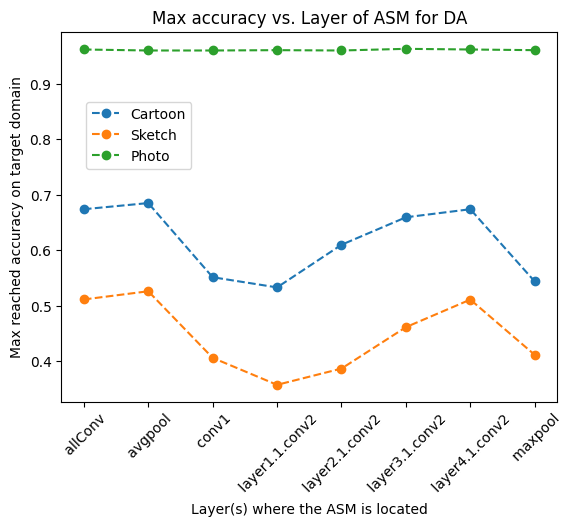

In [71]:
# A table is best
plot_DA_results()

In [72]:
def table_DA_results() :
    cartoon_file = "./results/DA/cartoon/results.csv"
    photo_file = "./results/DA/photo/results.csv"
    sketch_file = "./results/DA/sketch/results.csv"

    if not path.exists(cartoon_file) or not path.exists(photo_file) or not path.exists(sketch_file) :
        raise BaseException('One or more files not found')
    
    cartoon_res = pd.read_csv(cartoon_file)
    cartoon_res.columns = cartoon_res.columns.str.strip()
    cartoon_res = cartoon_res.rename(columns={'Location of ASM (if needed)' : 'Loc_ASM'})
    
    sketch_res = pd.read_csv(sketch_file)
    sketch_res.columns = sketch_res.columns.str.strip()
    sketch_res = sketch_res.rename(columns={'Location of ASM (if needed)' : 'Loc_ASM'})
    
    photo_res = pd.read_csv(photo_file)
    photo_res.columns = photo_res.columns.str.strip()
    photo_res = photo_res.rename(columns={'Location of ASM (if needed)' : 'Loc_ASM'})

    datasets = {'Cartoon' : cartoon_res, 'Sketch' : sketch_res, 'Photo' : photo_res}
    acc_max = dict()
    for name, dataset in datasets.items() :
        acc_max[name] = dict()
        for layer in np.unique(dataset['Loc_ASM']) :
            acc_max[name][layer] = np.max(dataset[dataset['Loc_ASM'] == layer]['Accuracy'])

    layers = np.unique(cartoon_res['Loc_ASM'])
    table = pd.DataFrame(np.array([layers, list(acc_max['Cartoon'].values()), list(acc_max['Sketch'].values()), list(acc_max['Photo'].values())]).T, columns=["Layer(s) of ASM", "Art Painting $\longrightarrow$ Cartoon", "Art Painting $\longrightarrow$ Sketch", "Art Painting $\longrightarrow$ Photo"])
    table['Average'] = table[["Art Painting $\longrightarrow$ Cartoon", "Art Painting $\longrightarrow$ Sketch", "Art Painting $\longrightarrow$ Photo"]].astype(float).mean(numeric_only=True, axis=1)
    return table

In [73]:
table_DA_results()

,Layer(s) of ASM,Art Painting $\longrightarrow$ Cartoon,Art Painting $\longrightarrow$ Sketch,Art Painting $\longrightarrow$ Photo,Average
0,allConv,0.674061,0.511581,0.961677,0.715773
1,avgpool,0.685154,0.526343,0.95988,0.723792
2,conv1,0.551621,0.406465,0.95988,0.639322
3,layer1.1.conv2,0.533276,0.357852,0.960479,0.617202
4,layer2.1.conv2,0.610068,0.387121,0.95988,0.652357
5,layer3.1.conv2,0.659556,0.461695,0.962874,0.694709
6,layer4.1.conv2,0.674061,0.511326,0.961677,0.715688
7,maxpool,0.543942,0.41181,0.960479,0.638744


In [74]:
table_DA_results().style.hide(axis='index').to_latex()

'\\begin{tabular}{llllr}\nLayer(s) of ASM & Art Painting $\\longrightarrow$ Cartoon & Art Painting $\\longrightarrow$ Sketch & Art Painting $\\longrightarrow$ Photo & Average \\\\\n allConv & 0.674061 & 0.511581 & 0.961677 & 0.715773 \\\\\n avgpool & 0.685154 & 0.526343 & 0.959880 & 0.723792 \\\\\n conv1 & 0.551621 & 0.406465 & 0.959880 & 0.639322 \\\\\n layer1.1.conv2 & 0.533276 & 0.357852 & 0.960479 & 0.617202 \\\\\n layer2.1.conv2 & 0.610068 & 0.387121 & 0.959880 & 0.652357 \\\\\n layer3.1.conv2 & 0.659556 & 0.461695 & 0.962874 & 0.694709 \\\\\n layer4.1.conv2 & 0.674061 & 0.511326 & 0.961677 & 0.715688 \\\\\n maxpool & 0.543942 & 0.411810 & 0.960479 & 0.638744 \\\\\n\\end{tabular}\n'

# EXTENSION - No Binarization
Both parts: Random and DA

In [75]:
def table_DA_results_nobin() :
    cartoon_file = "./results/DA_no_binarization/cartoon/results.csv"
    photo_file = "./results/DA_no_binarization/photo/results.csv"
    sketch_file = "./results/DA_no_binarization/sketch/results.csv"

    if not path.exists(cartoon_file) or not path.exists(photo_file) or not path.exists(sketch_file) :
        raise BaseException('One or more files not found')
    
    cartoon_res = pd.read_csv(cartoon_file)
    cartoon_res.columns = cartoon_res.columns.str.strip()
    cartoon_res = cartoon_res.rename(columns={'Location of ASM (if needed)' : 'Loc_ASM'})
    
    sketch_res = pd.read_csv(sketch_file)
    sketch_res.columns = sketch_res.columns.str.strip()
    sketch_res = sketch_res.rename(columns={'Location of ASM (if needed)' : 'Loc_ASM'})
    
    photo_res = pd.read_csv(photo_file)
    photo_res.columns = photo_res.columns.str.strip()
    photo_res = photo_res.rename(columns={'Location of ASM (if needed)' : 'Loc_ASM'})

    datasets = {'Cartoon' : cartoon_res, 'Sketch' : sketch_res, 'Photo' : photo_res}
    acc_max = dict()
    for name, dataset in datasets.items() :
        acc_max[name] = dict()
        for layer in np.unique(dataset['Loc_ASM']) :
            acc_max[name][layer] = np.max(dataset[dataset['Loc_ASM'] == layer]['Accuracy'])

    layers = np.unique(cartoon_res['Loc_ASM'])
    table = pd.DataFrame(np.array([layers, list(acc_max['Cartoon'].values()), list(acc_max['Sketch'].values()), list(acc_max['Photo'].values())]).T, columns=["Layer(s) of ASM", "Art Painting $\longrightarrow$ Cartoon", "Art Painting $\longrightarrow$ Sketch", "Art Painting $\longrightarrow$ Photo"])
    table['Average'] = table[["Art Painting $\longrightarrow$ Cartoon", "Art Painting $\longrightarrow$ Sketch", "Art Painting $\longrightarrow$ Photo"]].astype(float).mean(numeric_only=True, axis=1)
    return table


def table_random_results_nobin() :
    cartoon_file = "./results/random_no_binarization/cartoon/results.csv"
    photo_file = "./results/random_no_binarization/photo/results.csv"
    sketch_file = "./results/random_no_binarization/sketch/results.csv"

    if not path.exists(cartoon_file) or not path.exists(photo_file) or not path.exists(sketch_file) :
        raise BaseException('One or more files not found')
    
    cartoon_res = pd.read_csv(cartoon_file)
    cartoon_res.columns = cartoon_res.columns.str.strip()
    cartoon_res = cartoon_res.rename(columns={'Ratio of 1s (if random)' : 'ratio_1'})

    sketch_res = pd.read_csv(sketch_file)
    sketch_res.columns = sketch_res.columns.str.strip()
    sketch_res = sketch_res.rename(columns={'Ratio of 1s (if random)' : 'ratio_1'})
    
    photo_res = pd.read_csv(photo_file)
    photo_res.columns = photo_res.columns.str.strip()
    photo_res = photo_res.rename(columns={'Ratio of 1s (if random)' : 'ratio_1'})


    datasets = {'Cartoon' : cartoon_res, 'Sketch' : sketch_res, 'Photo' : photo_res}
    acc_max = dict()
    for name, dataset in datasets.items() :
        acc_max[name] = dict()
        for ratio in np.unique(dataset['ratio_1']) :
            acc_max[name][ratio] = np.max(dataset[dataset['ratio_1'] == ratio]['Accuracy'])
    
    ratios = np.unique(cartoon_res['ratio_1'])
    
    table = pd.DataFrame(np.array([ratios, list(acc_max['Cartoon'].values()), list(acc_max['Sketch'].values()), list(acc_max['Photo'].values())]).T, columns=["Ratio of '1'", "Art Painting $\longrightarrow$ Cartoon", "Art Painting $\longrightarrow$ Sketch", "Art Painting $\longrightarrow$ Photo"])
    table['Average'] = table[["Art Painting $\longrightarrow$ Cartoon", "Art Painting $\longrightarrow$ Sketch", "Art Painting $\longrightarrow$ Photo"]].astype(float).mean(numeric_only=True, axis=1)
    
    return table

In [76]:
table_random_results_nobin()


,Ratio of '1',Art Painting $\longrightarrow$ Cartoon,Art Painting $\longrightarrow$ Sketch,Art Painting $\longrightarrow$ Photo,Average
0,0.2,0.194966,0.188343,0.258683,0.213997
1,0.4,0.172782,0.154747,0.258683,0.195404
2,0.6,0.174488,0.207686,0.259281,0.213819
3,0.8,0.169795,0.207686,0.119162,0.165548
4,1.0,0.169795,0.209723,0.120958,0.166825


In [77]:
table_DA_results_nobin()

,Layer(s) of ASM,Art Painting $\longrightarrow$ Cartoon,Art Painting $\longrightarrow$ Sketch,Art Painting $\longrightarrow$ Photo,Average
0,allConv,0.674061,0.512853,0.961677,0.716197
1,avgpool,0.6843,0.525325,0.95988,0.723168
2,conv1,0.553754,0.407737,0.95988,0.640457
3,layer1.1.conv2,0.533703,0.357343,0.960479,0.617175
4,layer2.1.conv2,0.608788,0.385594,0.95988,0.651421
5,layer3.1.conv2,0.659556,0.462968,0.962275,0.694933
6,layer4.1.conv2,0.674061,0.51209,0.961677,0.715943
7,maxpool,0.544369,0.4141,0.961078,0.639849


In [78]:
print(table_random_results_nobin().style.hide(axis='index').to_latex())
print(table_DA_results_nobin().style.hide(axis='index').to_latex())

\begin{tabular}{rrrrr}
Ratio of '1' & Art Painting $\longrightarrow$ Cartoon & Art Painting $\longrightarrow$ Sketch & Art Painting $\longrightarrow$ Photo & Average \\
0.200000 & 0.194966 & 0.188343 & 0.258683 & 0.213997 \\
0.400000 & 0.172782 & 0.154747 & 0.258683 & 0.195404 \\
0.600000 & 0.174488 & 0.207686 & 0.259281 & 0.213819 \\
0.800000 & 0.169795 & 0.207686 & 0.119162 & 0.165548 \\
1.000000 & 0.169795 & 0.209723 & 0.120958 & 0.166825 \\
\end{tabular}

\begin{tabular}{llllr}
Layer(s) of ASM & Art Painting $\longrightarrow$ Cartoon & Art Painting $\longrightarrow$ Sketch & Art Painting $\longrightarrow$ Photo & Average \\
 allConv & 0.674061 & 0.512853 & 0.961677 & 0.716197 \\
 avgpool & 0.684300 & 0.525325 & 0.959880 & 0.723168 \\
 conv1 & 0.553754 & 0.407737 & 0.959880 & 0.640457 \\
 layer1.1.conv2 & 0.533703 & 0.357343 & 0.960479 & 0.617175 \\
 layer2.1.conv2 & 0.608788 & 0.385594 & 0.959880 & 0.651421 \\
 layer3.1.conv2 & 0.659556 & 0.462968 & 0.962275 & 0.694933 \\
 layer4.1

# EXTENSION - Top K binarization
Both parts: Random and DA

In [79]:

def table_random_results_topk() :
    cartoon_file = "./results/random_top_k/cartoon/results.csv"
    photo_file = "./results/random_top_k/photo/results.csv"
    sketch_file = "./results/random_top_k/sketch/results.csv"

    if not path.exists(cartoon_file) or not path.exists(photo_file) or not path.exists(sketch_file) :
        raise BaseException('One or more files not found')
    
    cartoon_res = pd.read_csv(cartoon_file)
    cartoon_res.columns = cartoon_res.columns.str.strip()
    cartoon_res = cartoon_res.rename(columns={'Ratio of 1s (if random)' : 'ratio_1', 'K (if needed)' : 'K'})

    sketch_res = pd.read_csv(sketch_file)
    sketch_res.columns = sketch_res.columns.str.strip()
    sketch_res = sketch_res.rename(columns={'Ratio of 1s (if random)' : 'ratio_1', 'K (if needed)' : 'K'})
    
    photo_res = pd.read_csv(photo_file)
    photo_res.columns = photo_res.columns.str.strip()
    photo_res = photo_res.rename(columns={'Ratio of 1s (if random)' : 'ratio_1', 'K (if needed)' : 'K'})


    datasets = {'Cartoon' : cartoon_res, 'Sketch' : sketch_res, 'Photo' : photo_res}
    acc_max = dict()
    K_max = dict()
    for name, dataset in datasets.items() :
        acc_max[name] = dict()
        K_max[name] = dict()
        for ratio in np.unique(dataset['ratio_1']) :
            acc_max[name][ratio] = np.max(dataset[dataset['ratio_1'] == ratio]['Accuracy'])
            idx = np.argmax(dataset[dataset['ratio_1'] == ratio]['Accuracy'])
            K_max[name][ratio] = dataset[dataset['ratio_1'] == ratio]['K'].iloc[idx]       
    
    ratios = np.unique(cartoon_res['ratio_1'])
    
    table = pd.DataFrame(np.array([ratios,
                                   list(acc_max['Cartoon'].values()),
                                   list(K_max['Cartoon'].values()),
                                   list(acc_max['Sketch'].values()),
                                   list(K_max['Sketch'].values()),
                                   list(acc_max['Photo'].values()),
                                   list(K_max['Photo'].values())]).T,
                                   columns=["Ratio of '1'", "Art Painting $\longrightarrow$ Cartoon", "K1", "Art Painting $\longrightarrow$ Sketch", "K2", "Art Painting $\longrightarrow$ Photo", "K3"])
    table['Average'] = table[["Art Painting $\longrightarrow$ Cartoon", "Art Painting $\longrightarrow$ Sketch", "Art Painting $\longrightarrow$ Photo"]].astype(float).mean(numeric_only=True, axis=1)
    
    return table

table_random_results_topk()

,Ratio of '1',Art Painting $\longrightarrow$ Cartoon,K1,Art Painting $\longrightarrow$ Sketch,K2,Art Painting $\longrightarrow$ Photo,K3,Average
0,0.2,0.165956,10.0,0.200560,20.0,0.113174,5.0,0.159896
1,0.4,0.165956,10.0,0.200560,20.0,0.117365,20.0,0.161294
2,0.6,0.174915,10.0,0.203614,10.0,0.152096,20.0,0.176875
3,0.8,0.166382,5.0,0.202596,20.0,0.139521,20.0,0.169500
4,1.0,0.166809,20.0,0.204123,20.0,0.162874,30.0,0.177935


In [80]:
def table_DA_results_topk() :
    cartoon_file = "./results/DA_top_k/cartoon/results.csv"
    photo_file = "./results/DA_top_k/photo/results.csv"
    sketch_file = "./results/DA_top_k/sketch/results.csv"

    if not path.exists(cartoon_file) or not path.exists(photo_file) or not path.exists(sketch_file) :
        raise BaseException('One or more files not found')
    
    cartoon_res = pd.read_csv(cartoon_file)
    cartoon_res.columns = cartoon_res.columns.str.strip()
    cartoon_res = cartoon_res.rename(columns={'Location of ASM (if needed)' : 'Loc_ASM', 'K (if needed)' : 'K'})
    
    sketch_res = pd.read_csv(sketch_file)
    sketch_res.columns = sketch_res.columns.str.strip()
    sketch_res = sketch_res.rename(columns={'Location of ASM (if needed)' : 'Loc_ASM', 'K (if needed)' : 'K'})
    
    photo_res = pd.read_csv(photo_file)
    photo_res.columns = photo_res.columns.str.strip()
    photo_res = photo_res.rename(columns={'Location of ASM (if needed)' : 'Loc_ASM', 'K (if needed)' : 'K'})

    datasets = {'Cartoon' : cartoon_res, 'Sketch' : sketch_res, 'Photo' : photo_res}
    acc_max = dict()
    K_max = dict()
    for name, dataset in datasets.items() :
        acc_max[name] = dict()
        K_max[name] = dict()
        for layer in np.unique(dataset['Loc_ASM']) :
            acc_max[name][layer] = np.max(dataset[dataset['Loc_ASM'] == layer]['Accuracy'])
            idx = np.argmax(dataset[dataset['Loc_ASM'] == layer]['Accuracy'])
            K_max[name][layer] = dataset[dataset['Loc_ASM'] == layer]['K'].iloc[idx]       

    layers = np.unique(cartoon_res['Loc_ASM'])
    table = pd.DataFrame(np.array([layers,
                                   list(acc_max['Cartoon'].values()),
                                   list(K_max['Cartoon'].values()),
                                   list(acc_max['Sketch'].values()),
                                   list(K_max['Sketch'].values()),
                                   list(acc_max['Photo'].values()),
                                   list(K_max['Photo'].values())]).T,
                                   columns=["Layer(s) of ASM", "Art Painting $\longrightarrow$ Cartoon", "K", "Art Painting $\longrightarrow$ Sketch", "K", "Art Painting $\longrightarrow$ Photo", "K"])
    table['Average'] = table[["Art Painting $\longrightarrow$ Cartoon", "Art Painting $\longrightarrow$ Sketch", "Art Painting $\longrightarrow$ Photo"]].astype(float).mean(numeric_only=True, axis=1)
    return table


table_DA_results_topk()

,Layer(s) of ASM,Art Painting $\longrightarrow$ Cartoon,K,Art Painting $\longrightarrow$ Sketch,K,Art Painting $\longrightarrow$ Photo,K,Average
0,allConv,0.679181,20,0.517434,5,0.963473,10,0.720029
1,avgpool,0.691126,20,0.529142,10,0.962275,5,0.727515
2,conv1,0.56186,10,0.418682,5,0.962275,5,0.647606
3,layer1.1.conv2,0.543942,5,0.368287,5,0.961677,5,0.624635
4,layer2.1.conv2,0.616041,5,0.397048,20,0.960479,5,0.657856
5,layer3.1.conv2,0.666809,5,0.468058,5,0.963473,20,0.699447
6,layer4.1.conv2,0.679181,5,0.517434,20,0.962874,5,0.719830
7,maxpool,0.555887,5,0.431153,10,0.961078,5,0.649373


In [82]:
print(table_random_results_topk().style.hide(axis='index').to_latex())
print(table_DA_results_topk().style.hide(axis='index').to_latex())

\begin{tabular}{rrrrrrrr}
Ratio of '1' & Art Painting $\longrightarrow$ Cartoon & K1 & Art Painting $\longrightarrow$ Sketch & K2 & Art Painting $\longrightarrow$ Photo & K3 & Average \\
0.200000 & 0.165956 & 10.000000 & 0.200560 & 20.000000 & 0.113174 & 5.000000 & 0.159896 \\
0.400000 & 0.165956 & 10.000000 & 0.200560 & 20.000000 & 0.117365 & 20.000000 & 0.161294 \\
0.600000 & 0.174915 & 10.000000 & 0.203614 & 10.000000 & 0.152096 & 20.000000 & 0.176875 \\
0.800000 & 0.166382 & 5.000000 & 0.202596 & 20.000000 & 0.139521 & 20.000000 & 0.169500 \\
1.000000 & 0.166809 & 20.000000 & 0.204123 & 20.000000 & 0.162874 & 30.000000 & 0.177935 \\
\end{tabular}

\begin{tabular}{lllllllr}
Layer(s) of ASM & Art Painting $\longrightarrow$ Cartoon & K & Art Painting $\longrightarrow$ Sketch & K & Art Painting $\longrightarrow$ Photo & K & Average \\
 allConv & 0.679181 & 20 & 0.517434 & 5 & 0.963473 & 10 & 0.720029 \\
 avgpool & 0.691126 & 20 & 0.529142 & 10 & 0.962275 & 5 & 0.727515 \\
 conv1 & 0.56